In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
salary = pd.read_csv("D:\KAGGLE DATASETS\Salary_Data_exp\Salary_Data.csv")

In [3]:
salary.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
salary.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
salary.dropna(axis=0,inplace=True)

In [7]:
salary.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
salary['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [9]:
data_scientist = salary[salary["Job Title"]=="Data Scientist"]

In [10]:
data_scientist.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
32,29.0,Male,Master's,Data Scientist,3.0,75000.0
375,31.0,Male,Master's,Data Scientist,6.0,160000.0
379,30.0,Male,PhD,Data Scientist,5.0,180000.0
383,33.0,Male,PhD,Data Scientist,8.0,190000.0
387,27.0,Male,PhD,Data Scientist,2.0,115000.0


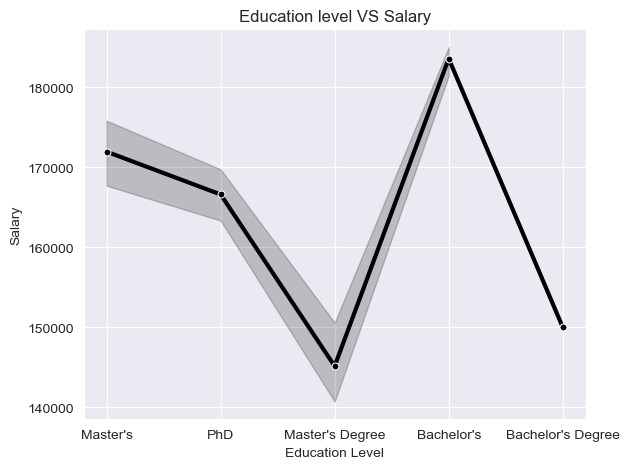

In [11]:
sns.lineplot(data_scientist,x= "Education Level",y="Salary",ls="-",lw=3,marker=".",color ="k",markersize=10)
plt.title("Education level VS Salary")
plt.tight_layout()

Text(0.5, 1.0, 'Years of Experience VS Salary')

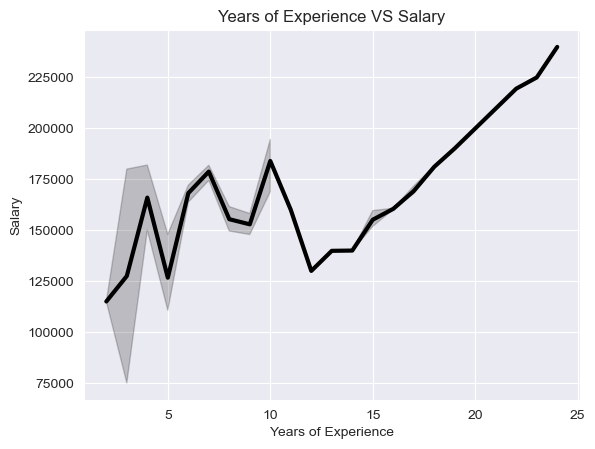

In [12]:
sns.lineplot(data=data_scientist,x="Years of Experience",y="Salary",ls="-",lw=3,color ="k")
plt.title("Years of Experience VS Salary")

<Axes: xlabel='Age', ylabel='Salary'>

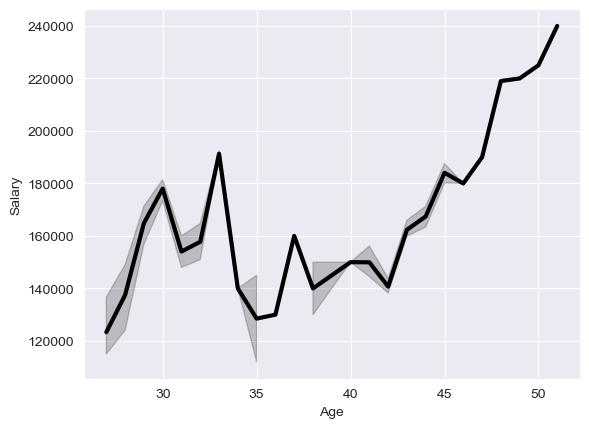

In [13]:
sns.lineplot(data=data_scientist,x="Age",y="Salary",ls="-",lw=3,color ="k")

<Axes: xlabel='Gender', ylabel='Salary'>

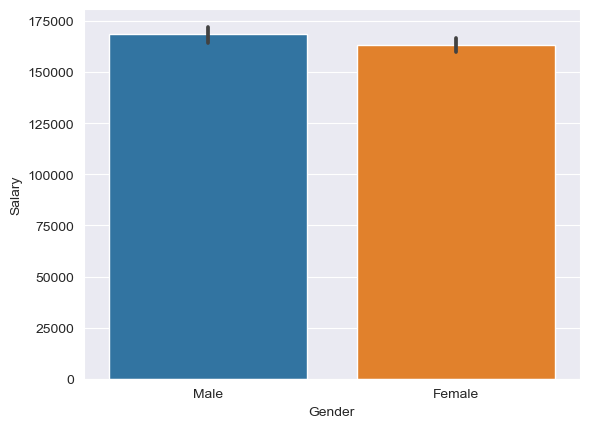

In [14]:
sns.barplot(data_scientist,x="Gender",y="Salary")

# machine learning model

In [15]:
gender = pd.get_dummies(data_scientist["Gender"],drop_first=True)

In [16]:
education_level = pd.get_dummies(data_scientist['Education Level'],drop_first=True)

In [17]:
data_scientist2 = pd.concat([data_scientist,gender,education_level],axis=1)

In [18]:
data_scientist2.drop(['Gender','Education Level','Job Title'],axis=1,inplace=True)

In [19]:
data_scientist2

,Age,Years of Experience,Salary,Male,Bachelor's Degree,Master's,Master's Degree,PhD
32,29.0,3.0,75000.0,1,0,1,0,0
375,31.0,6.0,160000.0,1,0,1,0,0
379,30.0,5.0,180000.0,1,0,0,0,1
383,33.0,8.0,190000.0,1,0,0,0,1
387,27.0,2.0,115000.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
6202,32.0,9.0,145000.0,0,0,0,0,1
6216,32.0,9.0,145000.0,0,0,0,0,1
6230,32.0,9.0,145000.0,0,0,0,0,1
6244,32.0,9.0,145000.0,0,0,0,0,1


In [20]:
X= data_scientist2.drop('Salary',axis=1)

In [21]:
y= data_scientist2['Salary']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
print("Accuracy : ",model3.score(X_test,y_test)*100)

Accuracy :  88.66666666666667


In [26]:
pred = model3.predict(X_test)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     75000.0       0.00      0.00      0.00         1
    100000.0       0.80      1.00      0.89         4
    110000.0       0.00      0.00      0.00         1
    112000.0       0.00      0.00      0.00         0
    115000.0       1.00      1.00      1.00         6
    130000.0       0.50      0.50      0.50         2
    140000.0       0.96      1.00      0.98        26
    145000.0       0.86      0.86      0.86         7
    150000.0       0.89      0.73      0.80        11
    155000.0       0.00      0.00      0.00         2
    157000.0       0.83      1.00      0.91         5
    160000.0       0.70      1.00      0.82         7
    162000.0       0.00      0.00      0.00         2
    168000.0       1.00      1.00      1.00         2
    170000.0       0.00      0.00      0.00         3
    180000.0       0.83      1.00      0.91        15
    182000.0       1.00      0.50      0.67         2
    183000.0       1.00    

In [28]:
new = np.array([19.0,1.0,1,1,0,0,0])
reshaped_data = new.reshape(1,-1)
reshaped_data

array([[19.,  1.,  1.,  1.,  0.,  0.,  0.]])

In [29]:
new_pred = model3.predict(reshaped_data)

In [30]:
print("Your Salary :",new_pred)

Your Salary : [115000.]
